In [2]:
%matplotlib inline
from qiskit_finance import QiskitFinanceError
from qiskit_finance.data_providers import *
import datetime
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

In [3]:
data = RandomDataProvider(
    tickers=["TICKER1", "TICKER2"],
    start=datetime.datetime(2016, 1, 1),
    end=datetime.datetime(2016, 1, 30),
    seed=1,
)
data.run()

Means:
[33.97683271 97.61130683]
A time-series similarity measure:
[[1.00000000e+00 5.41888011e-04]
 [5.41888011e-04 1.00000000e+00]]


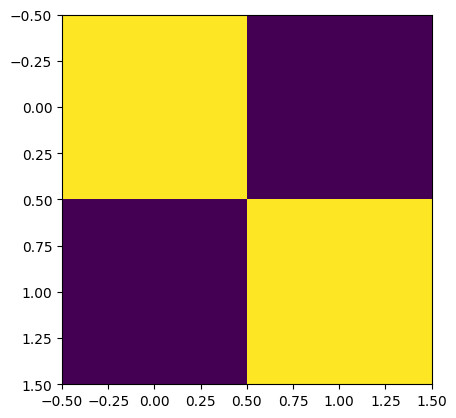

A covariance matrix:
[[2.08413157 0.20842107]
 [0.20842107 1.99542187]]


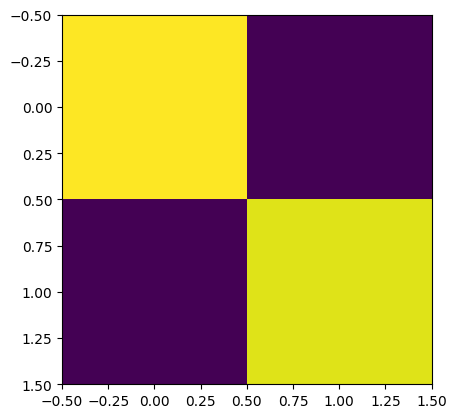

In [4]:
means = data.get_mean_vector()
print("Means:")
print(means)

rho = data.get_similarity_matrix()
print("A time-series similarity measure:")
print(rho)
plt.imshow(rho)
plt.show()

cov = data.get_covariance_matrix()
print("A covariance matrix:")
print(cov)
plt.imshow(cov)
plt.show()

The underlying evolution of stock prices:


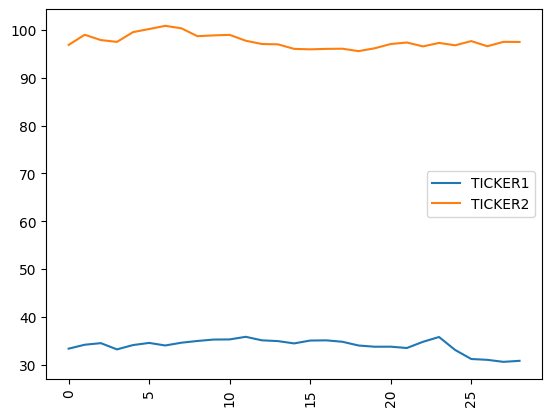

TICKER1
[33.345584192064784, 34.167202335565946, 34.49763941174933, 33.19448218014497, 34.099838046818086, 34.5462126191821, 34.009259383821814, 34.59037748801817, 34.95494988420424, 35.24908238085977, 35.27750462217556, 35.82421760878801, 35.08776352178634, 34.92485357379329, 34.442734261113316, 35.04158047374794, 35.0813025812296, 34.78884583026451, 34.00693736790767, 33.7497451272888, 33.757887307807145, 33.48228440250777, 34.77634821690598, 35.783072532211776, 33.07191005324581, 31.182896807278134, 31.008124715222973, 30.585934303646617, 30.799577301145227]
TICKER2
[96.8774156647853, 98.99525441983634, 97.88323365714406, 97.50562865001707, 99.5484002575094, 100.19510325371124, 100.85816662608751, 100.34416025440004, 98.69608508354439, 98.86354982776713, 98.97256391558868, 97.7452118613441, 97.06198519956354, 96.98994151983632, 96.04518989677554, 95.94691992892332, 96.04240295639278, 96.07798919344826, 95.57169753513395, 96.16544560691977, 97.0566125612021, 97.37746086576867, 96.559

In [5]:
print("The underlying evolution of stock prices:")
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

for (cnt, s) in enumerate(data._tickers):
    print(s)
    print(data._data[cnt])

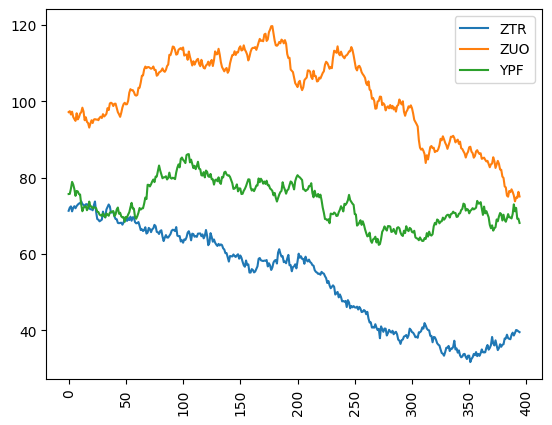

In [6]:
data = RandomDataProvider(
    tickers=["ZTR", "ZUO", "YPF"],
    start=datetime.datetime(2016, 1, 1),
    end=datetime.datetime(2017, 1, 30),
    seed=1,
)
data.run()
for (cnt, s) in enumerate(data._tickers):
    plt.plot(data._data[cnt], label=s)
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [6]:
stocks = ["GOOG", "AAPL"]

token = "REPLACE-ME"
if token != "REPLACE-ME":
    try:
        wiki = WikipediaDataProvider(
            token=token,
            tickers=stocks,
            start=datetime.datetime(2016, 1, 1),
            end=datetime.datetime(2016, 1, 30),
        )
        wiki.run()
    except QiskitFinanceError as ex:
        print(ex)
        print("Error retrieving data.")

In [7]:
if token != "REPLACE-ME":
    if wiki._data:
        if wiki._n <= 1:
            print(
                "Not enough wiki data to plot covariance or time-series similarity. Please use at least two tickers."
            )
        else:
            rho = wiki.get_similarity_matrix()
            print("A time-series similarity measure:")
            print(rho)
            plt.imshow(rho)
            plt.show()

            cov = wiki.get_covariance_matrix()
            print("A covariance matrix:")
            print(cov)
            plt.imshow(cov)
            plt.show()
    else:
        print("No wiki data loaded.")

In [8]:
if token != "REPLACE-ME":
    if wiki._data:
        print("The underlying evolution of stock prices:")
        for (cnt, s) in enumerate(stocks):
            plt.plot(wiki._data[cnt], label=s)
        plt.legend()
        plt.xticks(rotation=90)
        plt.show()

        for (cnt, s) in enumerate(stocks):
            print(s)
            print(wiki._data[cnt])
    else:
        print("No wiki data loaded.")

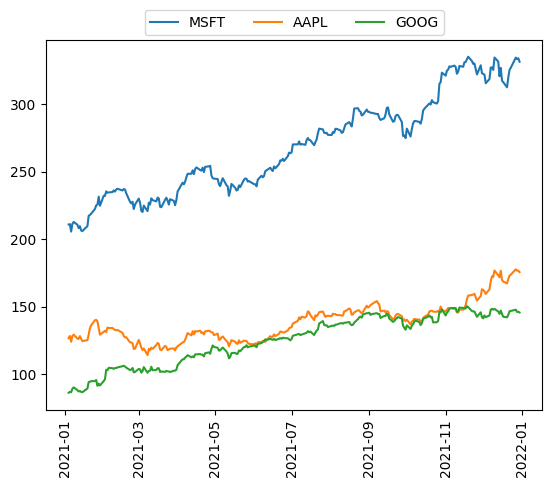

In [9]:
try:
    data = YahooDataProvider(
        tickers=["MSFT", "AAPL", "GOOG"],
        start=datetime.datetime(2021, 1, 1),
        end=datetime.datetime(2021, 12, 31),
    )
    data.run()
    for (cnt, s) in enumerate(data._tickers):
        plt.plot(data._data[cnt], label=s)
    plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3)
    plt.xticks(rotation=90)
    plt.show()
except QiskitFinanceError as ex:
    data = None
    print(ex)